## imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## load and preprocess dataset

In [14]:
data = pd.read_csv('penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [16]:
data.dropna(inplace=True)

In [18]:
# One-hot encode the 'sex' column
encoder = OneHotEncoder()
encoded_sex = encoder.fit_transform(data[['sex']]).toarray()
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['sex']))

In [20]:
# Combine the encoded 'sex' column with the original features
features = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
features = pd.concat([features.reset_index(drop=True), encoded_sex_df.reset_index(drop=True)], axis=1)

In [21]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## k-means clustering

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## visualizating clusters

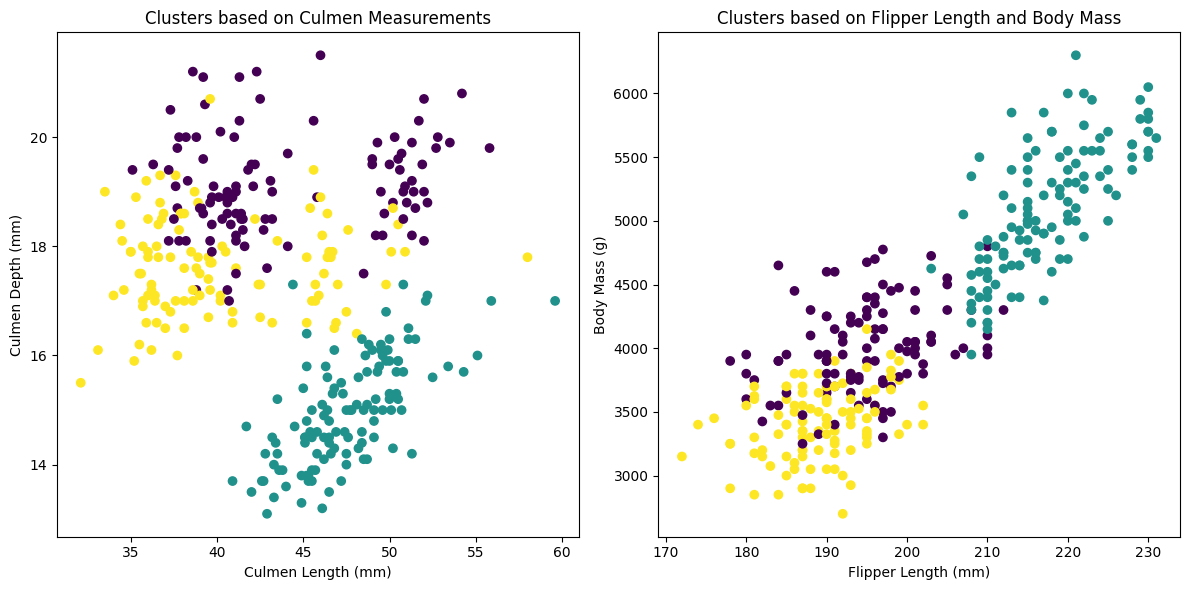

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['culmen_length_mm'], data['culmen_depth_mm'], c=data['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Clusters based on Culmen Measurements')

plt.subplot(1, 2, 2)
plt.scatter(data['flipper_length_mm'], data['body_mass_g'], c=data['cluster'], cmap='viridis')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Clusters based on Flipper Length and Body Mass')

plt.tight_layout()
plt.show()